In [1]:
# standard libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.simplefilter('ignore')
import gc

# visualisation
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# dataprep
from dataprep.clean import clean_text

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tqdm.keras import TqdmCallback
import keras_tuner as kt
import pickle

In [2]:
# load data
df = pd.read_csv('E:\Papers\mentalhealth\mentalhealthdataset\mental_health.csv')
# drop NULLs
df.dropna(inplace=True)
# view
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


Cleaning Text

In [3]:

df = clean_text(df,'text')

Label Distribution

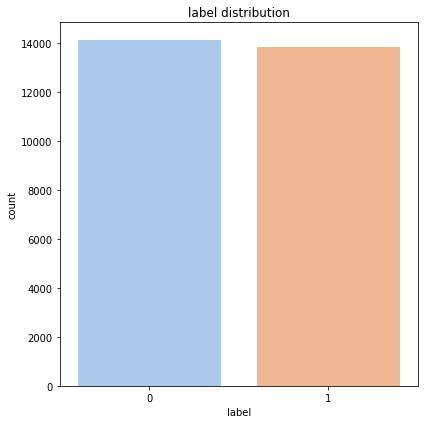

In [4]:
fig = plt.figure(figsize=(6, 6))
plt.title("label distribution")
sns.countplot(x=df['label'],palette='pastel')
fig.tight_layout()
plt.show()

Word to Vector
Count Vectorizer

In [5]:
# vectorize
vectorizer = CountVectorizer(min_df=0, lowercase=True)
vectorizer.fit(df['text'])
# vectorizer.vocabulary_

CountVectorizer(min_df=0)

In [6]:
# feature engineering
sentences = df['text'].values
y = df['label'].values

# train-test split [80-20]
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=42)

In [7]:
# vectorize (again!)
vectorizer.fit(sentences_train)
x_train = vectorizer.transform(sentences_train)
x_test  = vectorizer.transform(sentences_test)

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,f1_score,r2_score

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

model_list={"Decision Tree Classifier":DecisionTreeClassifier(),"Logistic Regression":LogisticRegression(),"SVC":SVC()}


Result DataFrame to store Scores, Accuracy, Error

In [10]:
result=pd.DataFrame(columns=['Name of Model','accuracy','f1_score',"r2score"])
result

,Name of Model,accuracy,f1_score,r2score


Trainning Model on Training Dataset

In [11]:
def train_model(models):
    for model_name,model in models.items():
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        result.loc[len(result.index)]=[model_name,accuracy_score(pred,y_test),
        f1_score(pred,y_test),
        r2_score(pred,y_test),]
        cm = confusion_matrix(y_test, pred, labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot()
        plt.show()

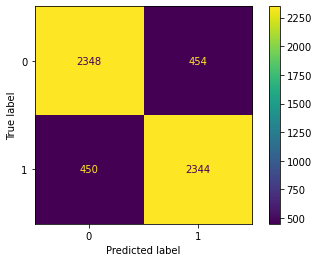

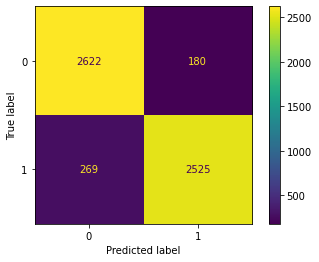

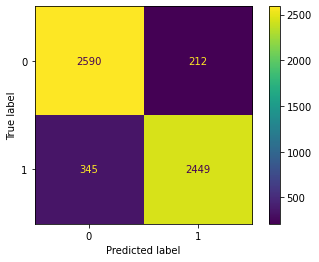

In [12]:
train_model(model_list)

Result-->Logistic Regression with highest accuracy of 92%

In [13]:
result

,Name of Model,accuracy,f1_score,r2score
0,Decision Tree Classifier,0.838456,0.838340,0.353824
1,Logistic Regression,0.919764,0.918349,0.678702
2,SVC,0.900465,0.897892,0.600902


To Save best model in pickle file

In [14]:


# model=LogisticRegression()
# model.fit(x_train,y_train)
# pickle.dump(model,open("mentalmodel","wb"))
# pickle.dump(vectorizer,open("vectorizer","wb"))